In [28]:
import pandas as pd

from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [2]:
train_df = pd.read_csv('titanic_train.csv')

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# preprocessing

X = train_df.drop(labels=['PassengerId', 'Survived', 'Name', 'Cabin'], axis=1)
X = pd.get_dummies(X)

X.Age = X.Age.median()

y = train_df.Survived

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=.33,
    random_state=42
)

In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

print(f'Train {clf.score(X_train, y_train)}')
print(f'Test {clf.score(X_test, y_test)}')

Train 0.8137583892617449
Test 0.8101694915254237


In [5]:
max_depths = range(1, 100)
scores_df = pd.DataFrame()

for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    cross_val_score = model_selection.cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    tmp_df = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_val_score': [cross_val_score]
    })
    
    scores_df = scores_df.append(tmp_df)

scores_df

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.793624,0.772881,0.765154
0,3,0.813758,0.810169,0.778557
0,4,0.830537,0.800000,0.783557
0,5,0.843960,0.796610,0.800364
...,...,...,...,...
0,95,0.988255,0.800000,0.803725
0,96,0.988255,0.820339,0.798711
0,97,0.988255,0.806780,0.791975
0,98,0.988255,0.810169,0.798697


<AxesSubplot:xlabel='max_depth', ylabel='score'>

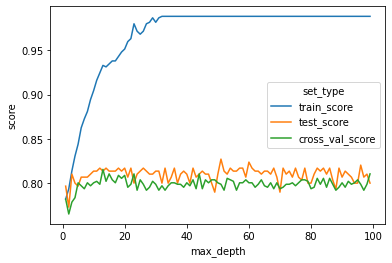

In [6]:
grouped = scores_df.melt(
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'cross_val_score'],
    var_name='set_type',
    value_name='score'
)

sns.lineplot(data=grouped, hue='set_type', x='max_depth', y='score')

In [9]:
clf = tree.DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 30)
}

cv = model_selection.GridSearchCV(clf, params, cv=5)

cv

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [10]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [13]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [15]:
best_clf = cv.best_estimator_

best_clf

DecisionTreeClassifier(max_depth=11)

In [16]:
best_clf.score(X_test, y_test)

0.8

In [18]:
metrics.precision_score(y_test, best_clf.predict(X_test))

0.8210526315789474

In [19]:
metrics.recall_score(y_test, best_clf.predict(X_test))

0.65

<AxesSubplot:>

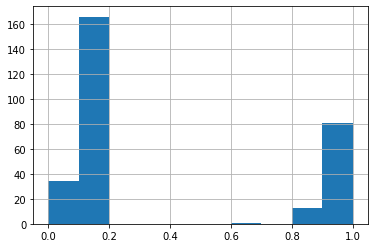

In [23]:
y_predicted_prob = best_clf.predict_proba(X_test)

pd.Series(y_predicted_prob[:, 1]).hist()

In [24]:
np.where(y_predicted_prob > 0.6, 1, 0)

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1,

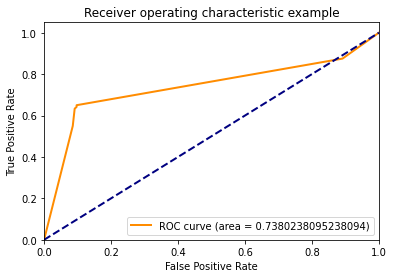

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()